# Exercise 7 - Visualization

### Tone Alsvik Finstad

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import seaborn as sns
import scipy as sp

### 1. Spotting correlations

Load the remote file:

```bash
https://www.dropbox.com/s/aamg1apjhclecka/regression_generated.csv
```

with Pandas and create scatter plots with all possible combinations of the following features:
    
  + features_1
  + features_2
  + features_3
  
Are these features correlated?

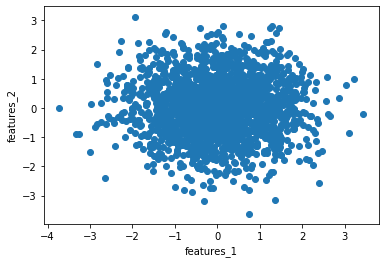

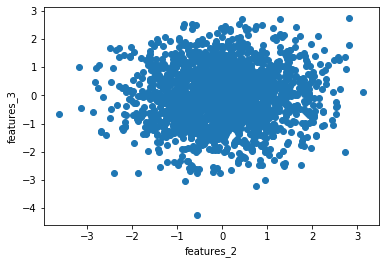

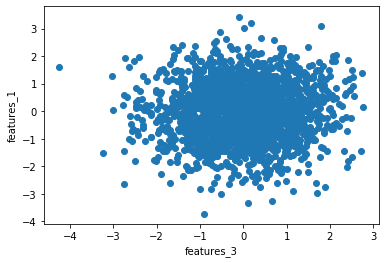

In [2]:
file_name = "regression_generated.csv"
df = pd.read_csv(file_name)

plt.scatter(df["features_1"],df["features_2"])
plt.xlabel("features_1")
plt.ylabel("features_2")
plt.show()
plt.scatter(df["features_2"],df["features_3"])
plt.xlabel("features_2")
plt.ylabel("features_3")
plt.show()
plt.scatter(df["features_3"],df["features_1"])
plt.xlabel("features_3")
plt.ylabel("features_1")
plt.show()

There is no apparent correlation between the values, as the dots seem random and there is no clear pattern.

### 2. Color-coded scatter plot

Produce a scatter plot from a dataset with two categories.

* Write a function that generates a 2D dataset consisting of 2 categories. Each category should distribute as a 2D gaussian with a given mean and standard deviation. Set different values of the mean and standard deviation between the two samples.
* Display the dataset in a scatter plot marking the two categories with different marker colors.

An example is given below:

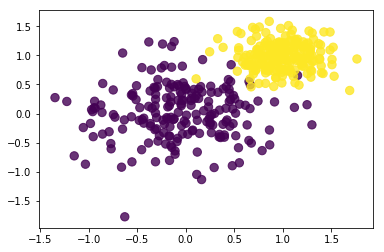

In [3]:
from IPython.display import Image
Image('images/two_categories_scatter_plot.png')

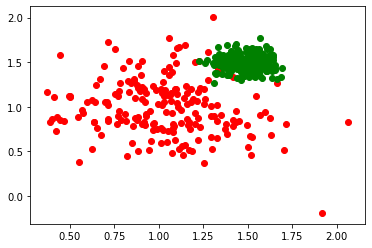

In [17]:
import numpy as np
import matplotlib.pyplot as plt

N = 200

data1= np.random.normal(loc=1,scale=0.3,size=(2,N))
data2= np.random.normal(loc=1.5,scale=0.1,size=(2,N))


    
plt.scatter(data1[0,:], data1[1,:], c='red')
plt.scatter(data2[0,:], data2[1,:], c='green')
plt.show()


### 3. Profile plot

Produce a profile plot from a scatter plot.
* Download the following pickle file:
```bash
wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/
```
* Inspect the dataset, you'll find two variables (features)
* Convert the content to a Pandas Dataframe
* Clean the sample by selecting the entries (rows) with the absolute values of the variable "residual" smaller than 2
* Plot a Seaborn `jointplot` of "residuals" versus "distances", and use seaborn to display a linear regression. 

Comment on the correlation between these variables.

* Create manually (without using seaborn) the profile histogram for the "distance" variable; choose an appropriate binning.
* Obtain 3 numpy arrays:
  * `x`, the array of bin centers of the profile histogram of the "distance" variable
  * `y`, the mean values of the "residuals", estimated in slices (bins) of "distance"
  * `err_y`, the standard deviation of the of the "residuals", estimated in slices (bins) of "distance"
* Plot the profile plot on top of the scatter plot

{'residuals': array([ 1.1       , -1.95      , -7.2       , ...,  0.08333333,
        0.16666667,  0.08333333]), 'distances': array([16. ,  6.3,  3.4, ...,  1.7, 19.1,  2.6])}


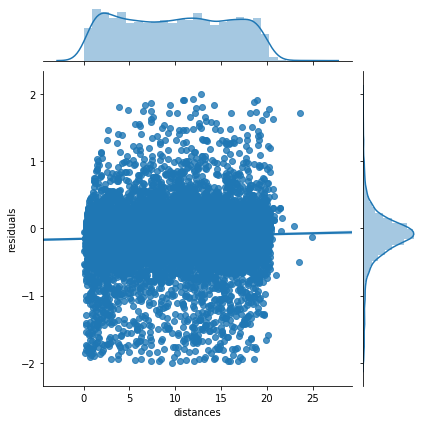

In [18]:
# Read pickle
infile = open("residuals_261.pkl", 'rb')
new_dict = pickle.load(infile)
infile.close()

print(new_dict)

df_residuals = pd.read_pickle('residuals_261.pkl')
df=pd.DataFrame(df_residuals.item())
df

df_clean=df[np.abs(df["residuals"])<2]
df_clean

sns.jointplot(data=df_clean, x="distances", y="residuals", kind="reg")

There is seemingly no correlation between the two values.

In [22]:
x_borders = np.linspace(0,20,9) 
x = (x_borders[1:]+x_borders[:-1])/2
print(x)

dig = np.digitize(df_clean["distances"], x)
y = [df_clean["residuals"][dig == i].mean() for i in range(1, len(x_borders))]
print(y)

err_y = [df_clean["residuals"][dig == i].std() for i in range(1, len(x_borders))]
print(err_y)

[ 1.25  3.75  6.25  8.75 11.25 13.75 16.25 18.75]
[-0.16209792754311064, -0.13453115520958248, -0.09437151580031976, -0.0728359708071407, -0.0994930525401627, -0.14134470218955486, -0.14316205604783885, -0.047012114845945516]
[0.4133457442504932, 0.4137023414656768, 0.4434217198579661, 0.4403652040922353, 0.4773371656575189, 0.4664345637329531, 0.40863153896981785, 0.4075713374639707]


<ErrorbarContainer object of 3 artists>

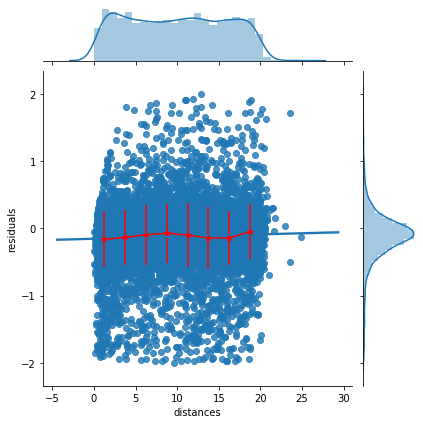

In [23]:
sns.jointplot(data=df_clean, x="distances", y="residuals", kind="reg")
plt.errorbar(x=x, y=y, yerr=err_y, marker="*", color="red")

### 4. Kernel Density Estimate

Produce a KDE for a given distribution (by hand, not using seaborn):

* Fill a numpy array `x` of length N (with $N=\mathcal{O}(100)$) with a variable normally distributed, with a given mean and standard deviation
* Fill an histogram in pyplot taking proper care of the aesthetic:
   * use a meaningful number of bins
   * set a proper y axis label
   * set proper value of y axis major ticks labels (e.g. you want to display only integer labels)
   * display the histograms as data points with errors (the error being the poisson uncertainty)
* For every element of `x`, create a gaussian with the mean corresponding to the element value and the standard deviation as a parameter that can be tuned. The standard deviation default value should be:
$$ 1.06 * x.std() * x.size ^{-\frac{1}{5}} $$
you can use the scipy function `stats.norm()` for that.
* In a separate plot (to be placed beside the original histogram), plot all the gaussian functions so obtained
* Sum (with `np.sum()`) all the gaussian functions and normalize the result such that the integral matches the integral of the original histogram. For that you could use the `scipy.integrate.trapz()` method. Superimpose the normalized sum of all gaussians to the first histogram.


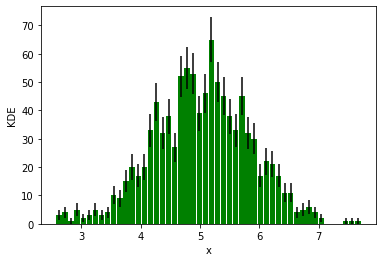

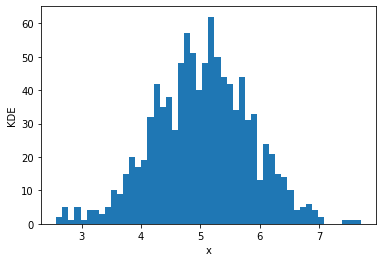

In [25]:
N=1000
sigma=5
mu=0.8
x= np.random.normal(sigma,mu,size=N)

y,binEdges = np.histogram(x,bins=50)
bincenters = 0.5*(binEdges[1:]+binEdges[:-1])
width      = 0.09
menStd = np.sqrt(y)
plt.bar(bincenters, y, width=width, color='g', yerr=menStd)
plt.xlabel("x")
plt.ylabel("KDE")
plt.show()


std_dev=1.06*x.std()*x.size**(-1/5)

def gauss(x, std_dev=std_dev, N=N):
    g=[]
    for i in x:
        gauss=sp.stats.norm.rvs(i, std_dev, N)
        g.append(gauss)
    return g
g=gauss(x)

g_sum=[]
for elem in g:
    s=np.sum(elem)
    g_sum.append(s)
trapz=sp.integrate.trapz(g)/N

plt.hist(trapz,50)
plt.xlabel("x")
plt.ylabel("KDE")
plt.show()

